#                                   Diabetic Prediction

Diabetes prediction is a critical task for early intervention and management of the disease. This study focuses on the application of classification models for predicting diabetes. A comprehensive dataset comprising various clinical and demographic features related to diabetic patients is utilized. Preprocessing techniques are applied to prepare the data, followed by the implementation of several classification algorithms for better understandings. Performance evaluation is conducted using metrics such as accuracy, precision, recall, and F1-score. The results highlight the effectiveness of classification models in accurately predicting diabetes, facilitating timely intervention and personalized treatment plans. The findings of this study hold significant implications for healthcare professionals, enabling them to make informed decisions for diabetes prevention and management, thereby improving patient outcomes and quality of life.

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATA

In [4]:
data = pd.read_csv(r"C:\Users\karth\MLpga09\PGA_09\Deployment\DIABETES PREDICTION\archive\diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.shape

(100000, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dataset Information :

                   The dataset consists of several predictor values and one target values. The target variable is “diabetes” consists of 0 and 1. where 0 indicates no diabetes and 1 indicates patient has diabetes. The predictor variables are "gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level".
                   
                   The dataset consists of no missing values. The dataset has 2 object datatype “gender” and “smoking_history”, three float value “age”, “bmi” and “HbA1c_level”, and four integer value “hypertension”, “heart_disease”, “blood_glucose_level” and “diabetes”.

In [8]:
duplicates = data.duplicated().sum()
duplicates

3854

The dataset consists of 3854 duplicate values.

In [9]:
data = data.drop_duplicates()

The 3854 duplicate values are dropped.

In [10]:
data.shape

(96146, 9)

In [11]:
uniques = data.nunique()
print("The unique values are :","\n", uniques)

The unique values are : 
 gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


In [12]:
data.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [13]:
data.drop(data[data["gender"]=="Other"].index, inplace=True)

In [14]:
data.gender.value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

# Exploratory Data Analysis

In [15]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


 From above analysis, we can see that most of the variable has lesser dispersion values when we compare mean and Standard Deviation. This shows the data is normally distributed.

In [16]:
data.describe(include="O").T

,count,unique,top,freq
gender,96128,2,Female,56161
smoking_history,96128,6,never,34395


 The categorical value analysis includes the "gender" and "smoking_history" where this can be dummy encoded later, after splitting the data. So that we can avoid data overfitting, data leakage and to perform unbaised preprocessing.

# DATA VISUALIZATION 

UNIVARIATED ANALYSIS

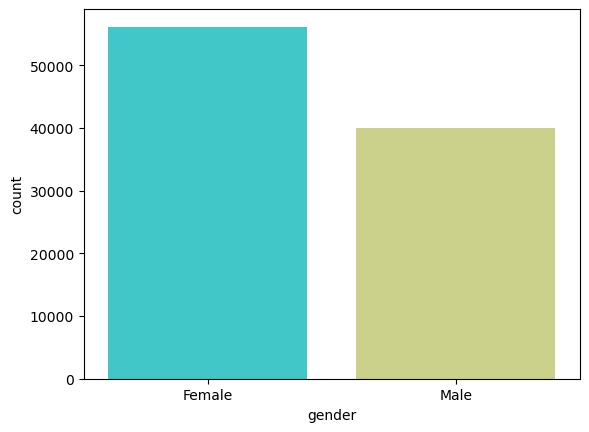

In [17]:
sns.countplot(x=data.gender, palette="rainbow")
plt.show()

In [18]:
data.smoking_history.value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

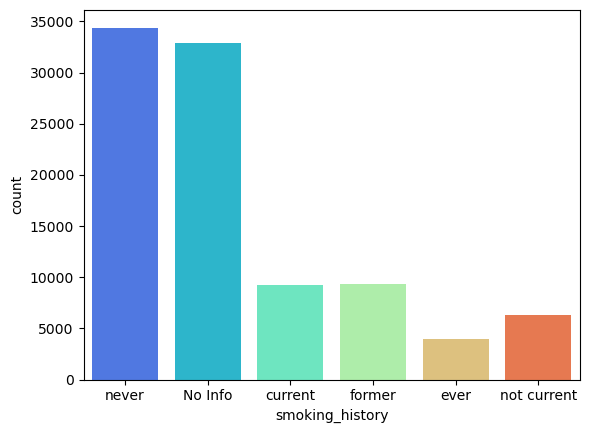

In [19]:
sns.countplot(x=data.smoking_history, palette ="rainbow")
plt.show()

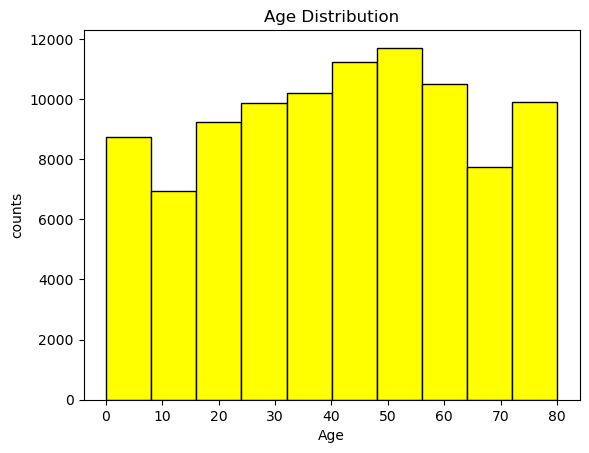

In [20]:
plt.hist(data["age"], color = "yellow", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("counts")
plt.show()

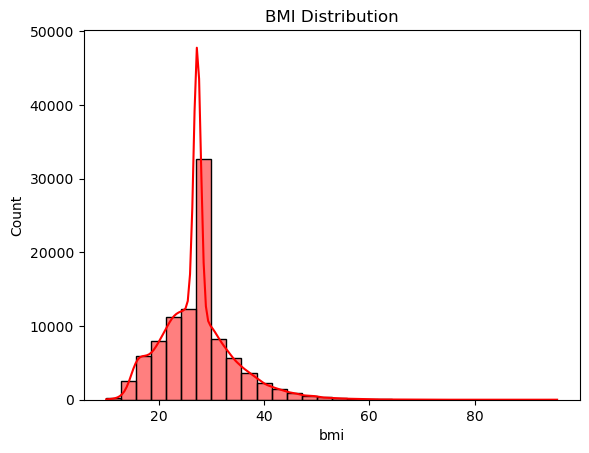

In [21]:
sns.histplot(data["bmi"],bins=30, kde=True, color="red")
plt.title("BMI Distribution")
plt.show()

In [22]:
data["diabetes"].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

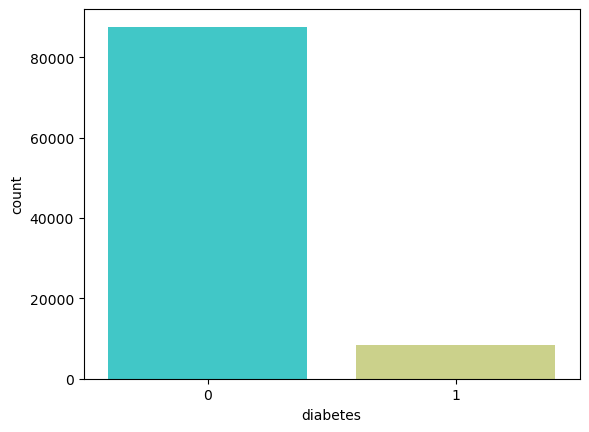

In [23]:
sns.countplot(x=data.diabetes, palette = "rainbow")
plt.show()

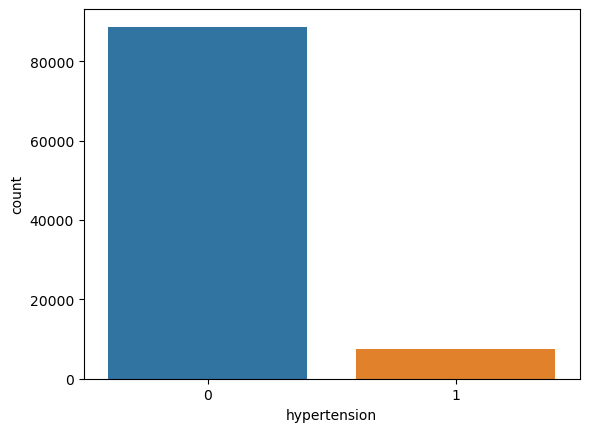

In [24]:
sns.countplot(x=data["hypertension"])
plt.show()

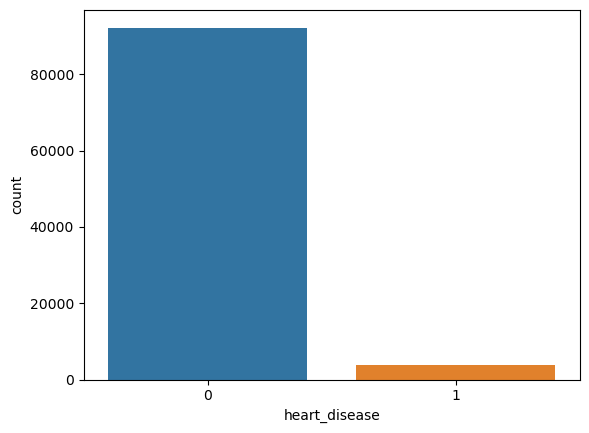

In [25]:
sns.countplot(x=data["heart_disease"])
plt.show()

BI-VARIATE ANALYSIS

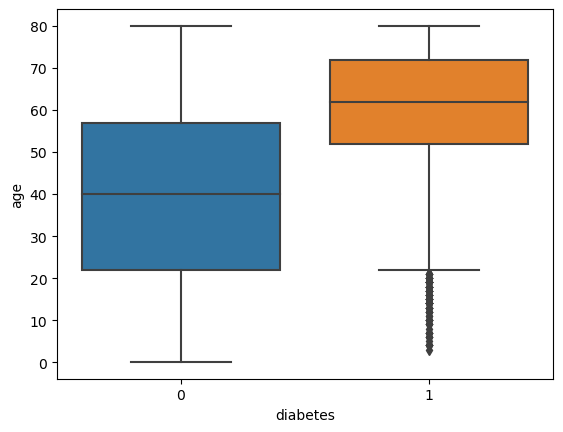

In [26]:
sns.boxplot(x= data.diabetes, y= data.age)
plt.show()

Above analysis shows patients age above 55 are most prone to have diabetes.

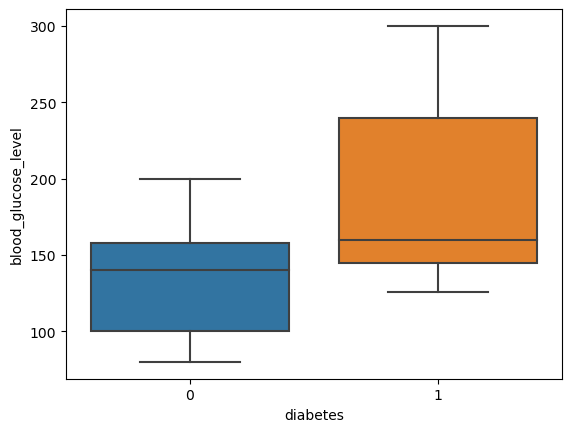

In [27]:
sns.boxplot(x= data.diabetes, y=data.blood_glucose_level)
plt.show()

The above bivariated analysis between blood glucose level shows, patients who has more blood glocose level that is greater than 150 are most probably prone to have diabetes.

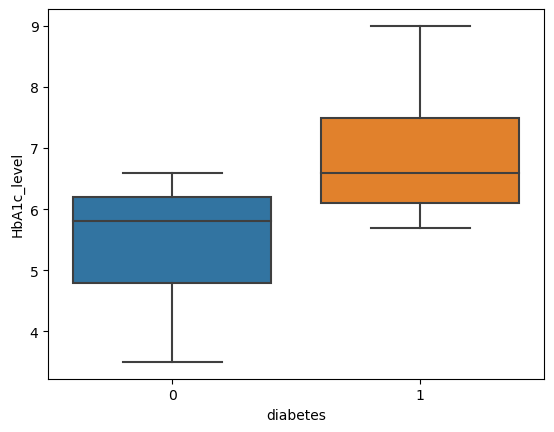

In [28]:
sns.boxplot(x=data.diabetes, y=data.HbA1c_level)
plt.show()

The analysis between HbA1c_level which is called as glycomated blood level and diabetes shows patients who having HbA1c_level greater than 6 are most prone to diabetes.

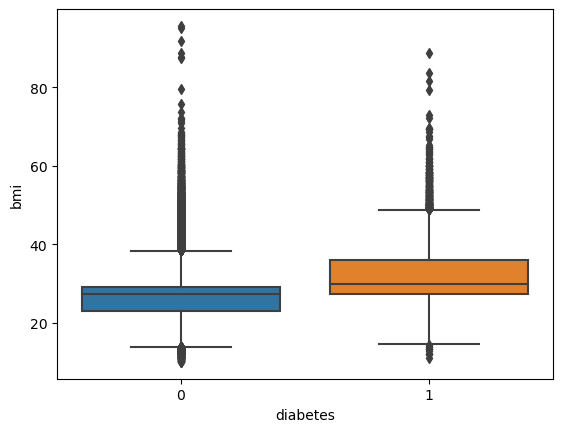

In [29]:
sns.boxplot(x=data.diabetes, y=data.bmi)
plt.show()

 The above bivariate analysis between the target variable and Bmi shows most of the patients has prone to diabetes ranges between 30 to 40. but we can clearly see there are more outliers in the above analysis which means that BMI is not really a factor for causing diabetes.

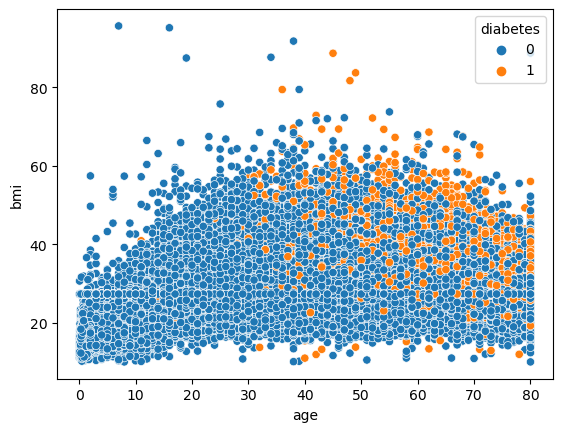

In [30]:
sns.scatterplot(x=data.age, y=data.bmi, hue=data.diabetes)
plt.show()

 The above analysis shows that the patients age above 40 and BMI ranging from 25 and above are mostly suffered by diabetes.

Data correlation

In [31]:
corr = data.corr()

ValueError: could not convert string to float: 'Female'

In [ ]:
sns.heatmap(corr, annot=True, annot_kws={"size":10})
plt.show()

In [ ]:
sns.heatmap(corr[(corr>=0.8)|(corr<=-0.8)], annot=True, vmax=1.0, vmin=-1.0, annot_kws={"size":10})
plt.show()

Since we have 6 different unique values in smoking_history.where most of the values shows same instance, so we can reduce the unique values by below code snippet.

In [32]:
def cate(label):
    if label in ["not current","former", "ever"]:
        return "Past smoker"
    elif label in ["never", "No Info"]:
        return "Non smoker"
    elif label in ["current"]:
        return "Smoker"
    
data["smoking_history"] = data["smoking_history"].apply(cate)

In [33]:
data["smoking_history"].value_counts()

smoking_history
Non smoker     67276
Past smoker    19655
Smoker          9197
Name: count, dtype: int64

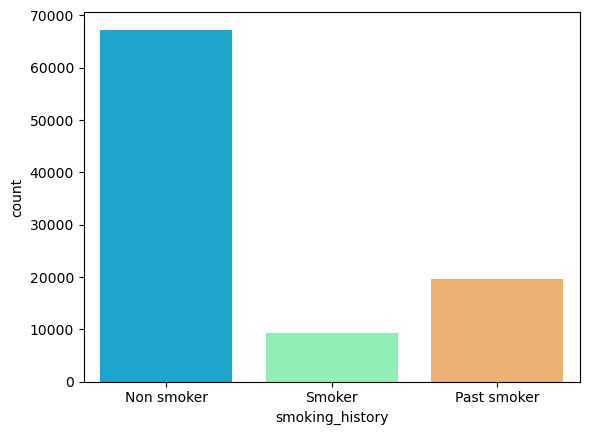

In [34]:
sns.countplot(x=data.smoking_history, palette = "rainbow")
plt.show()

 The above visualization shows most of the patients were non smokers. This shows smoking is not really a factor influenzing the patient's health.

In [35]:
df = data.copy() # coping data for backup

Splitting of data

In [36]:
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

In [37]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,Non smoker,25.19,6.6,140
1,Female,54.0,0,0,Non smoker,27.32,6.6,80
2,Male,28.0,0,0,Non smoker,27.32,5.7,158
3,Female,36.0,0,0,Smoker,23.45,5.0,155
4,Male,76.0,1,1,Smoker,20.14,4.8,155


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (67289, 8)
y_train (67289,)
X_test (28839, 8)
y_test (28839,)


Pre processing the categorical variables in X_train and y_train using dummy variable encoding.

In [40]:
x_train = pd.get_dummies(X_train)

In [41]:
x_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_Non smoker,smoking_history_Past smoker,smoking_history_Smoker
58189,45.0,0,0,26.62,3.5,159,False,True,True,False,False
89662,3.0,0,0,13.44,5.7,85,False,True,True,False,False
7183,41.0,0,0,24.64,4.5,160,True,False,False,True,False
86063,27.0,0,0,28.80,4.0,155,True,False,False,False,True
94129,67.0,0,0,27.32,6.5,155,True,False,False,True,False


In [42]:
x_test = pd.get_dummies(X_test)

In [43]:
x_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_Non smoker,smoking_history_Past smoker,smoking_history_Smoker
64542,27.0,0,0,19.85,4.5,100,True,False,True,False,False
30436,50.0,0,0,38.26,4.5,80,True,False,False,True,False
41865,11.0,0,0,32.67,4.8,85,False,True,True,False,False
66711,56.0,1,0,57.41,4.0,155,True,False,True,False,False
43418,72.0,0,0,36.24,4.8,160,True,False,False,True,False


In [44]:
x_test.shape

(28839, 11)

In [45]:
x_train.shape

(67289, 11)

In [46]:
import imblearn

Performing SMOTE and Random under sampling technique to identify minority and majority class from the dataset and create a balanced dataset.

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [48]:
smote = SMOTE(sampling_strategy=0.1)
run = RandomUnderSampler(sampling_strategy=0.5)

In [49]:
X_train_re, y_train_re = smote.fit_resample(x_train, y_train)

In [50]:
X_train_re, y_train_re = run.fit_resample(X_train_re, y_train_re)

In [51]:
X_train_re.shape

(18411, 11)

In [52]:
y_train_re.shape

(18411,)

In [53]:
X_train_re.size

202521

Import performace metrics

In [54]:
from sklearn import metrics

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# MODEL BUILDING

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Define functions to get the model metrics.

In [59]:
def get_report(model):
    return(classification_report(y_test, y_pred))

In [60]:
def kappa(model):
    return(cohen_kappa_score(y_test, y_pred))

In [61]:
def confusion(model):
    cm = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(data = cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
    sns.heatmap(con_mat, annot=True, fmt="d", cbar=False, linewidths=0.1, annot_kws={"size":15})
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10, rotation=45)
    plt.show()

In [62]:
def plot_roc(model):
   
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    plt.grid(True)

# Decision Tree

In [64]:
decision_tree = DecisionTreeClassifier(criterion= "entropy")
decision_tree_model = decision_tree.fit(X_train_re, y_train_re)

In [65]:
y_pred_prob = decision_tree_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 0., ..., 0., 0., 1.])

In [66]:
y_pred = decision_tree_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [67]:
test_report = get_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     26271
           1       0.48      0.84      0.61      2568

    accuracy                           0.90     28839
   macro avg       0.73      0.88      0.78     28839
weighted avg       0.94      0.90      0.92     28839



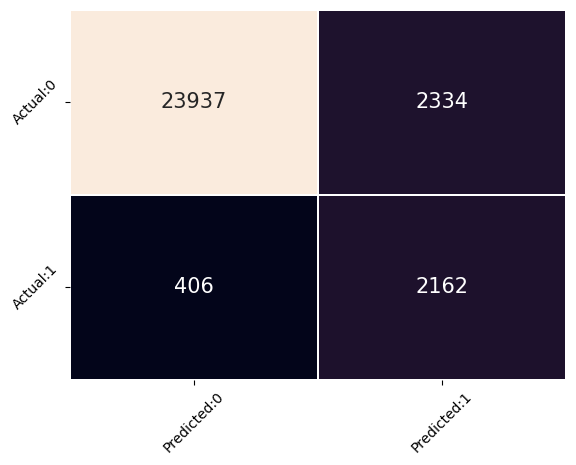

None


In [68]:
Confuse_matrix = confusion(decision_tree_model)
print(Confuse_matrix)

In [69]:
kappa_score = kappa(decision_tree_model)
print(kappa_score)

0.5625307677845268


None


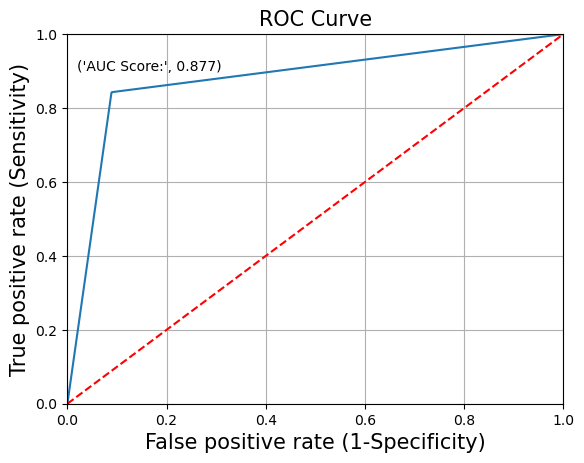

In [70]:
Roc = plot_roc(decision_tree_model)
print(Roc)

# RANDOM FOREST

In [74]:
Random_forest = RandomForestClassifier()

In [75]:
Random_forest_model = Random_forest.fit(X_train_re, y_train_re)

In [76]:
Random_forest_model.score(x_test, y_test)

0.9321058289122369

In [77]:
y_pred = Random_forest_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
y_pred_prob = Random_forest_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.42])

In [79]:
test_report = get_report(Random_forest_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     26271
           1       0.58      0.85      0.69      2568

    accuracy                           0.93     28839
   macro avg       0.78      0.89      0.83     28839
weighted avg       0.95      0.93      0.94     28839



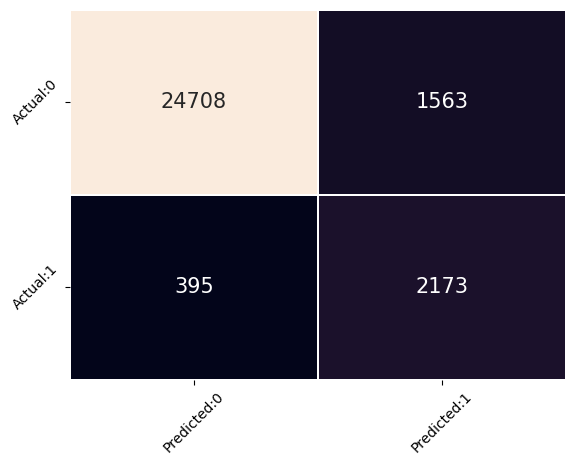

None


In [80]:
Confuse_matrix = confusion(Random_forest_model)
print(Confuse_matrix)

In [81]:
kappa_score = kappa(Random_forest_model)
print(kappa_score)

0.6527536181617997


None


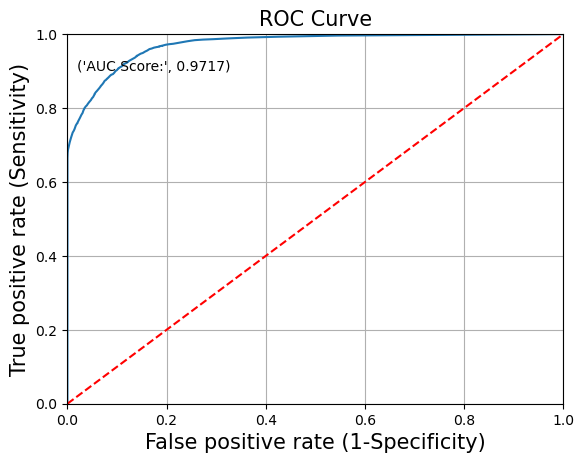

In [82]:
Roc = plot_roc(Random_forest_model)
print(Roc)

# SUPPORT VECTOR MACHINE - svm

In [84]:
Support_vector = SVC(kernel = "linear")
SVM_model = Support_vector.fit(X_train_re, y_train_re)

In [85]:
y_pred = SVM_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
decision_score = SVM_model.decision_function(x_test)

y_pred_prob = (decision_score - decision_score.min())/(decision_score.max() - decision_score.min())

print(y_pred_prob)

[0.17300248 0.27380789 0.21005005 ... 0.30284045 0.25741998 0.46721122]


In [87]:
test_report = get_report(SVM_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     26271
           1       0.55      0.81      0.66      2568

    accuracy                           0.92     28839
   macro avg       0.77      0.87      0.81     28839
weighted avg       0.94      0.92      0.93     28839



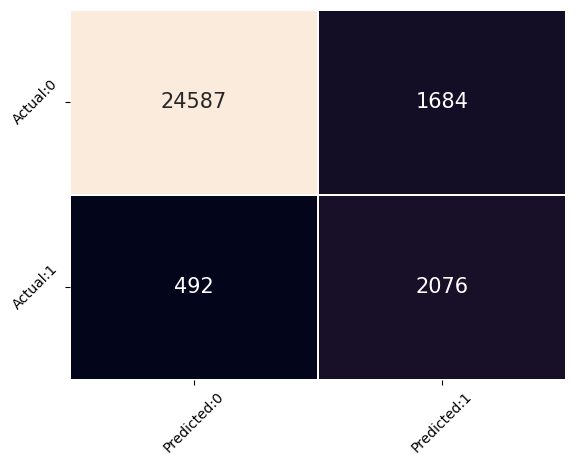

None


In [88]:
Confuse_matrix = confusion(SVM_model)
print(Confuse_matrix)

In [89]:
kappa_score = kappa(SVM_model)
print(kappa_score)

0.6154371891106113


None


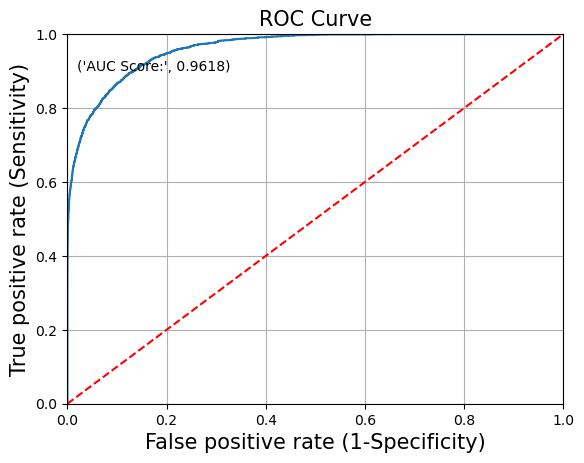

In [90]:
Roc = plot_roc(SVM_model)
print(Roc)

# Decision tree using bagging model

In [92]:
Bagging = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

Bagging_model = Bagging.fit(X_train_re, y_train_re)

In [93]:
y_pred = Bagging_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
y_pred_prob = Bagging_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0. , 0. , 0. , ..., 0. , 0. , 0.1])

In [95]:
test_report = get_report(Bagging_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     26271
           1       0.58      0.83      0.68      2568

    accuracy                           0.93     28839
   macro avg       0.78      0.89      0.82     28839
weighted avg       0.95      0.93      0.94     28839



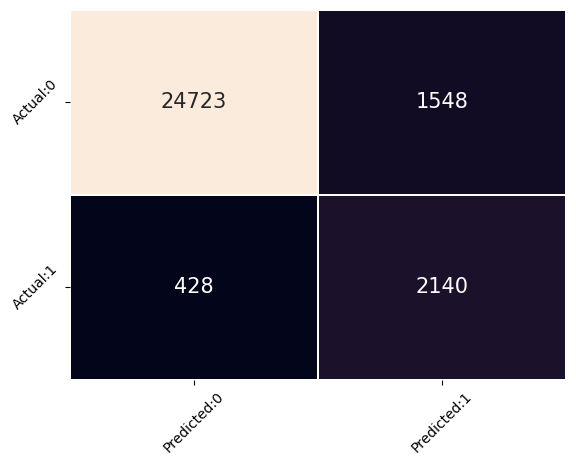

None


In [96]:
Confuse_matrix = confusion(Bagging_model)
print(Confuse_matrix)

In [97]:
kappa_score = kappa(Bagging_model)
print(kappa_score)

0.6470921952505702


None


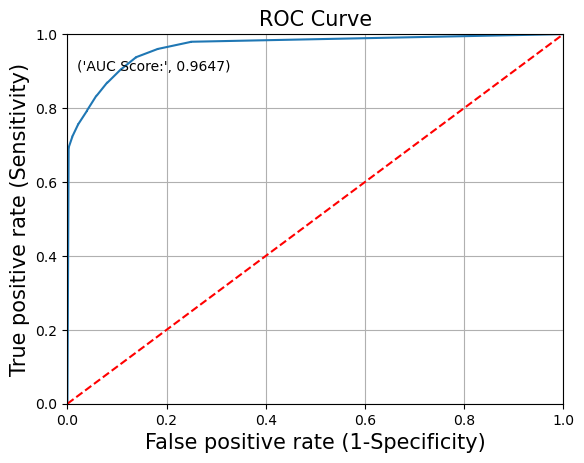

In [98]:
Roc = plot_roc(Bagging_model)
print(Roc)

# Hyperparameter Tuning for decision tree model

In [100]:
Tuned_parameters = [{"criterion": ["gini","entropy"],
                     "min_samples_split": [10,20,30],
                     "max_depth": [3,5,7,9],
                     "min_samples_leaf": [15,20,25,30,35],
                     "max_leaf_nodes": [5,10,15,20,25]}]

In [101]:
decision_tree_classification = DecisionTreeClassifier(random_state=10)
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = Tuned_parameters, cv=10)

GridSCV_model = grid.fit(X_train_re, y_train_re)

print("Best Parameters :", GridSCV_model.best_params_, "\n")

Best Parameters : {'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 25, 'min_samples_leaf': 20, 'min_samples_split': 10} 



In [102]:
dt_grid_model = DecisionTreeClassifier(criterion = GridSCV_model.best_params_.get("criterion"),
                                       max_depth = GridSCV_model.best_params_.get("max_depth"),
                                       max_leaf_nodes = GridSCV_model.best_params_.get("max_leaf_nodes"),
                                       min_samples_leaf = GridSCV_model.best_params_.get("min_samples_leaf"),
                                       min_samples_split = GridSCV_model.best_params_.get("min_samples_split"),
                                       random_state=10)

dt_grid_model = dt_grid_model.fit(X_train_re, y_train_re)

In [103]:
y_pred_prob = dt_grid_model.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25])

In [104]:
y_pred = dt_grid_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
test_report = get_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     26271
           1       0.61      0.84      0.71      2568

    accuracy                           0.94     28839
   macro avg       0.80      0.89      0.84     28839
weighted avg       0.95      0.94      0.94     28839



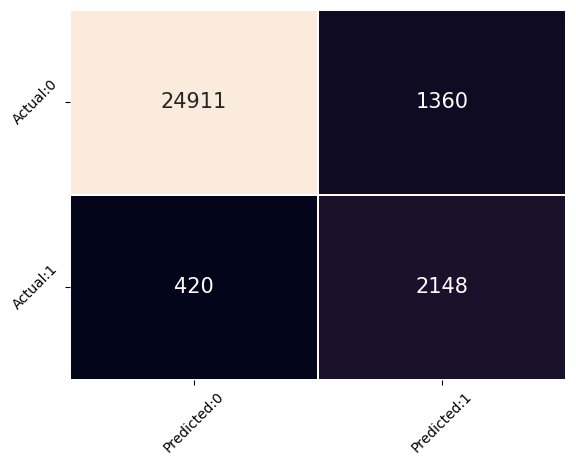

None


In [106]:
Confuse_matrix = confusion(dt_grid_model)
print(Confuse_matrix)

In [107]:
kappa_score = kappa(dt_grid_model)
print(kappa_score)

0.6734695482073776


None


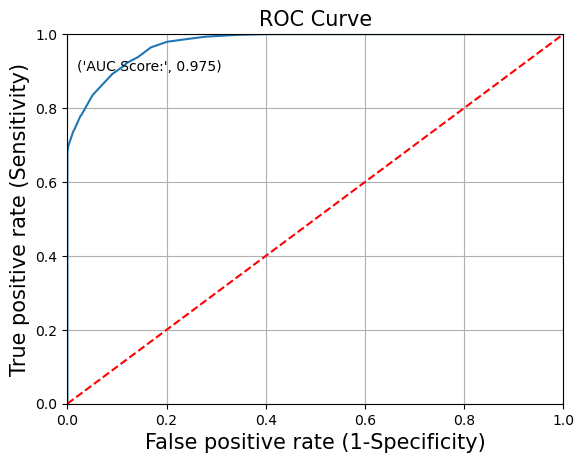

In [108]:
Roc = plot_roc(dt_grid_model)
print(Roc)

        After performing different types of models using the given dataset we can come into a conclusion that the Decision tree model after hyper parameter tuning has the higher accuracy when compared with other model. So this model can help the medical industries to predict who has prone to the diabetic disorder.